# Problema: Dataset de pingüinos:

Carga el sigiuente dataset y responde las siguientes preguntas:

```python
import pandas as pd
import seaborn as sns

# Cargar el dataset
df = sns.load_dataset('penguins')
```


1. ¿Cuántas especies diferentes de pingüinos hay en el dataset?


In [2]:
import pandas as pd
import seaborn as sns

df = sns.load_dataset('penguins')

In [3]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [5]:
df.groupby(["species"]).count()

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
species,,,,,,
Adelie,152,151,151,151,151,146
Chinstrap,68,68,68,68,68,68
Gentoo,124,123,123,123,123,119


In [6]:
species = df.species.unique()

print(species, type (species))

['Adelie' 'Chinstrap' 'Gentoo'] <class 'numpy.ndarray'>


**Respuesta:** Usando el método anterior vemos que existen 3 especies diferentes de pingüinos: Adelie, Chisntrap y Gentoo.

2. ¿Cuál es la longitud media del pico de los pingüinos de la especie Adelie?

In [7]:
df_Adelie = df[df["species"] == "Adelie"]
mu_BL_A = df_Adelie["bill_length_mm"].mean()

# Imprimimos con dos cifras decimales
print("La media de la longitud del pico de los pingüinos Adelie es: {:.2f} mm.".format(mu_BL_A))


La media de la longitud del pico de los pingüinos Adelie es: 38.79 mm.


3. ¿Cuál es la masa corporal promedio de los pingüinos de la especie Gentoo?

In [8]:
df_Chinstrap = df[df["species"] == "Chinstrap"]

df_Gentoo = df[df["species"] == "Gentoo"]
df_Gentoo["body_mass_g"].mean()

mu_CM_G = df_Gentoo["body_mass_g"].mean()

# Imprimimos con dos cifras decimales
print("La media de la masa corporal de los pingüinos Gentoo es: {:.2f} g.".format(mu_CM_G))

La media de la masa corporal de los pingüinos Gentoo es: 5076.02 g.


4. ¿Cuál es la relación entre la longitud del pico y la masa corporal de los pingüinos?

In [9]:
df["Mass / Bill Length"] = round(df["body_mass_g"] / df["bill_length_mm"], 2)
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,Mass / Bill Length
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,95.91
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,96.20
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,80.65
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,94.01


Text(0.5, 1.0, 'Masa vs Longitud del pico,\ncorrelación: 0.60')

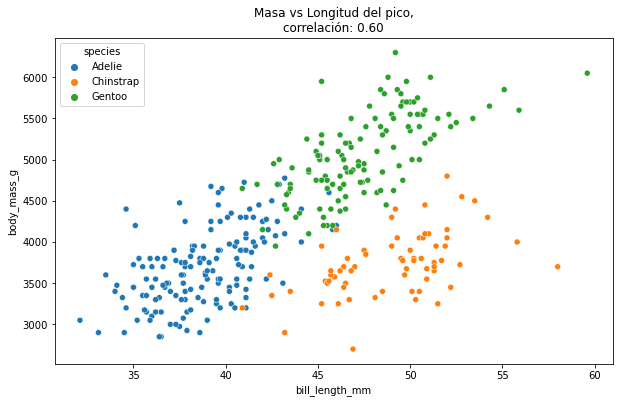

In [10]:
import matplotlib.pyplot as plt

corr_BL_BM = df['bill_length_mm'].corr(df['body_mass_g'])

# Graficamos la relación entre la masa y la longitud del pico
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="bill_length_mm", y="body_mass_g", hue="species")
plt.title("Masa vs Longitud del pico,\ncorrelación: {:.2f}".format(corr_BL_BM))

5. ¿Cuál es la isla con mayor número de pingüinos en el dataset?

In [11]:
import numpy as np
df.size

2752

In [12]:
df_island = df[df["island"] != np.nan]

In [13]:
df_island.size

2752

In [14]:
Biscoe_No = df[df["island"] == "Biscoe"].size
Dream_No = df[df["island"] == "Dream"].size
Torgersen_No = df[df["island"] == "Torgersen"].size

print("\n Biscoe: ", Biscoe_No, "\n Dream: ", Dream_No, "\n Torgersen: ", Torgersen_No)
print("\n Total: ", Biscoe_No + Dream_No + Torgersen_No)


 Biscoe:  1344 
 Dream:  992 
 Torgersen:  416

 Total:  2752


**Respuesta:** La isla Biscoe posee el mayor número de pingüinos del dataset con 1344 especímenes.

6. ¿Cuál es la desviación estándar de la longitud de la aleta de los pingüinos de la especie Chinstrap?

In [15]:
df_aletaChin = df[df["species"] == "Chinstrap"]
std_aletaChin = df_aletaChin["flipper_length_mm"].std()
print(std_aletaChin)

7.131894258578146


7. ¿Qué pingüino tiene el pico más largo en el dataset y cuál es su especie?

In [16]:
df["bill_length_mm"].max()

59.6

In [17]:
df_maxBillLength = df[df["bill_length_mm"] == df["bill_length_mm"].max()]
df_maxBillLength

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,Mass / Bill Length
253,Gentoo,Biscoe,59.6,17.0,230.0,6050.0,Male,101.51


**Respuesta:** El pinguino con el pico más largo es el 253 perteneciente a la especie Gentoo y posee 59.6 mm de longitud de pico.

8. ¿Cuál es la proporción de machos y hembras en la especie Adelie?

In [18]:
from fractions import Fraction

df_hembras = df[df["sex"] == "Female"]
df_machos = df[df["sex"] == "Male"]

print(df_hembras.size, df_machos.size, Fraction(df_hembras.size/df_machos.size).limit_denominator())

1320 1344 55/56


**Respuesta:** Por cada 55 hembras hay 56 machos en el dataframe.

9. ¿Existe una correlación significativa entre la longitud del pico y la masa corporal en las diferentes especies de pingüinos?

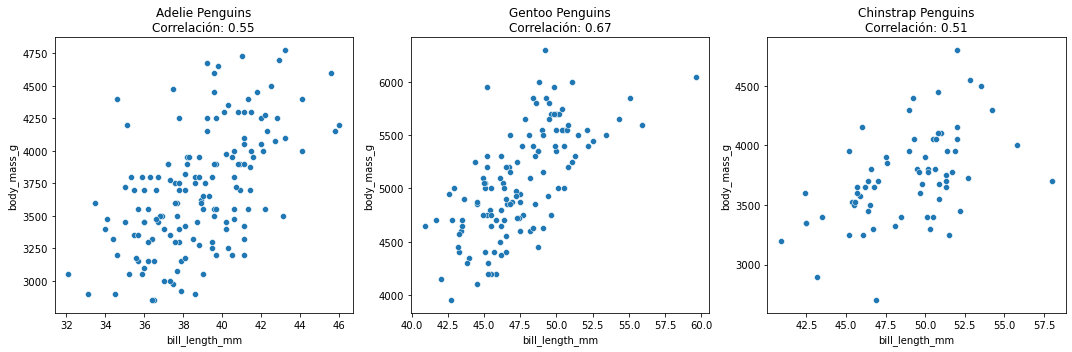

In [19]:
import matplotlib.pyplot as plt

corr_adelie = df_Adelie['bill_length_mm'].corr(df_Adelie['body_mass_g'])
corr_gentoo = df_Gentoo['bill_length_mm'].corr(df_Gentoo['body_mass_g'])
corr_chinstrap = df_Chinstrap['bill_length_mm'].corr(df_Chinstrap['body_mass_g'])

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

sns.scatterplot(data=df_Adelie, x="bill_length_mm", y="body_mass_g", ax=axs[0])
axs[0].set_title(f"Adelie Penguins\nCorrelación: {corr_adelie:.2f}")

sns.scatterplot(data=df_Gentoo, x="bill_length_mm", y="body_mass_g", ax=axs[1])
axs[1].set_title(f"Gentoo Penguins\nCorrelación: {corr_gentoo:.2f}")


sns.scatterplot(data=df_Chinstrap, x="bill_length_mm", y="body_mass_g", ax=axs[2])
axs[2].set_title(f"Chinstrap Penguins\nCorrelación: {corr_chinstrap:.2f}")

plt.tight_layout()
plt.show()

10. ¿Cuál es la distribución de la masa corporal entre las especies de pingüinos?

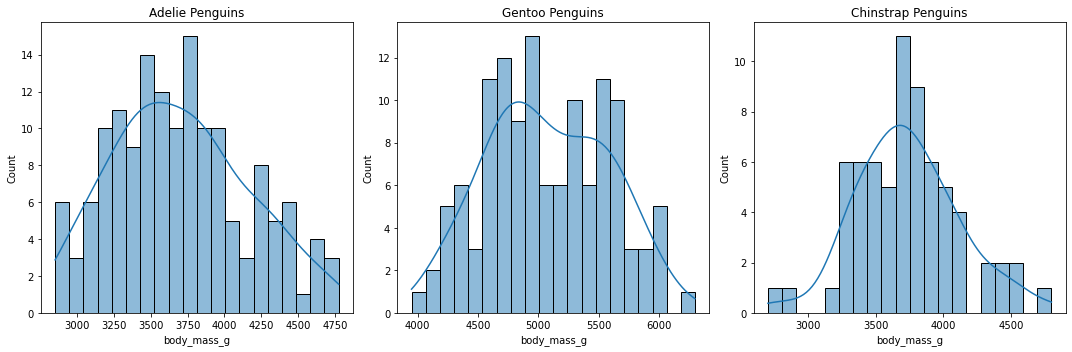

In [20]:
# Hacer una gráfica de barras de la masa corporal asociada a la especie Adelie

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

sns.histplot(data=df_Adelie, x="body_mass_g", bins=20, kde=True, ax = axs[0])
axs[0].set_title(f"Adelie Penguins")

sns.histplot(data=df_Gentoo, x="body_mass_g", bins=20, kde=True, ax = axs[1])
axs[1].set_title(f"Gentoo Penguins")

sns.histplot(data=df_Chinstrap, x="body_mass_g", bins=20, kde=True, ax = axs[2])
axs[2].set_title(f"Chinstrap Penguins")

plt.tight_layout()
plt.show()


11. ¿Cuál es la longitud mínima y máxima de la aleta entre las tres especies de pingüinos?

In [21]:
min_flipper = df["flipper_length_mm"].min()
max_flipper = df["flipper_length_mm"].max()

print("El pingüino con la aleta más corta mide: ", min_flipper, "mm.")
print("El pingüino con la aleta más larga mide: ", max_flipper, "mm.")

El pingüino con la aleta más corta mide:  172.0 mm.
El pingüino con la aleta más larga mide:  231.0 mm.


12. ¿Cuántos pingüinos tienen una masa corporal superior a 5000 gramos?

In [22]:
df_massOver5000 = df[df["body_mass_g"] > 5000]
No_massOver5000 = df_massOver5000.size

print(f"El número de pingüino con masa sobre 5000 gramos es de {No_massOver5000}")

El número de pingüino con masa sobre 5000 gramos es de 488


13. ¿Cómo varía la longitud del pico entre las diferentes especies de pingüinos en las distintas islas?

In [23]:
# Clasificando la longitud del pico por especie
df.groupby(["species"])["bill_length_mm"].describe()

,count,mean,std,min,25%,50%,75%,max
species,,,,,,,,
Adelie,151.0,38.791391,2.663405,32.1,36.75,38.80,40.750,46.0
Chinstrap,68.0,48.833824,3.339256,40.9,46.35,49.55,51.075,58.0
Gentoo,123.0,47.504878,3.081857,40.9,45.30,47.30,49.550,59.6


14. ¿Cuál es la relación entre la longitud de la aleta y la masa corporal en los pingüinos de la especie Gentoo?

Text(0.5, 1.0, 'Masa vs Longitud de las aletas,\ncorrelación: 0.67')

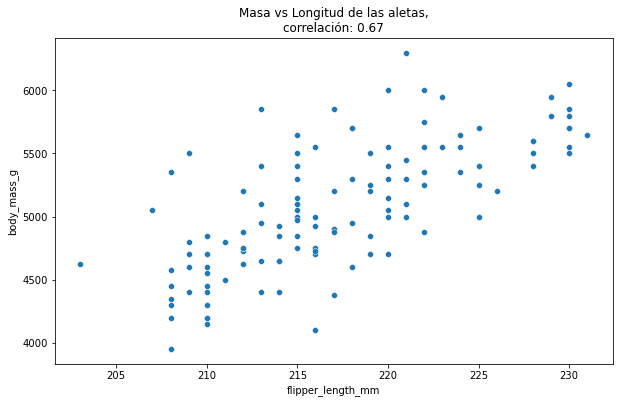

In [24]:
import matplotlib.pyplot as plt

corr_FL_BM = df_Gentoo['bill_length_mm'].corr(df_Gentoo['body_mass_g'])

# Graficamos la relación entre la masa y la longitud del pico
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_Gentoo, x="flipper_length_mm", y="body_mass_g")
plt.title("Masa vs Longitud de las aletas,\ncorrelación: {:.2f}".format(corr_FL_BM))

15. ¿Cuántos pingüinos tienen datos faltantes en alguna de sus características?

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   species             344 non-null    object 
 1   island              344 non-null    object 
 2   bill_length_mm      342 non-null    float64
 3   bill_depth_mm       342 non-null    float64
 4   flipper_length_mm   342 non-null    float64
 5   body_mass_g         342 non-null    float64
 6   sex                 333 non-null    object 
 7   Mass / Bill Length  342 non-null    float64
dtypes: float64(5), object(3)
memory usage: 21.6+ KB


In [26]:
df_faltantes = df[df.isna().any(axis=1)]

penguinWithNan = df_faltantes.shape[0]

print(f"Número de pingüinos con datos faltantes: {penguinWithNan}")

Número de pingüinos con datos faltantes: 11


16. ¿Cuál es la isla con la mayor variación en la longitud del pico entre las tres especies de pingüinos?

In [27]:
df.groupby(["island"])["bill_length_mm"].describe()

,count,mean,std,min,25%,50%,75%,max
island,,,,,,,,
Biscoe,167.0,45.257485,4.772731,34.5,42.00,45.80,48.70,59.6
Dream,124.0,44.167742,5.953527,32.1,39.15,44.65,49.85,58.0
Torgersen,51.0,38.950980,3.025318,33.5,36.65,38.90,41.10,46.0


17. ¿Cuál es la diferencia en masa corporal promedio entre machos y hembras de la especie Chinstrap?

In [28]:
mean_mass_Chinstrap = df_Chinstrap.groupby(["sex"])["body_mass_g"].mean()

print("La masa corporal promedio de los pingüinos Chinstrap es:")
print(mean_mass_Chinstrap)

diferenceMassSex = abs(mean_mass_Chinstrap[0] - mean_mass_Chinstrap[1])
print("\nLa diferencia de la masa corporal promedio entre machos y hembras es de: {:.2f} g.".format(diferenceMassSex), "donde la de los machos es mayor.")

La masa corporal promedio de los pingüinos Chinstrap es:
sex
Female    3527.205882
Male      3938.970588
Name: body_mass_g, dtype: float64

La diferencia de la masa corporal promedio entre machos y hembras es de: 411.76 g. donde la de los machos es mayor.



18. ¿Qué especie de pingüino tiene la longitud de aleta promedio más alta?

In [29]:
# Promedios de longitud de aleta por especie
df_FlipperLength = df.groupby(["species"])["flipper_length_mm"].mean()
df_FlipperLength


species
Adelie       189.953642
Chinstrap    195.823529
Gentoo       217.186992
Name: flipper_length_mm, dtype: float64

**Respuesta:** La especie Gentoo  tiene el promdio de longitud de aleta más alta.


19. ¿Cuál es la longitud del pico más pequeña registrada en el dataset y de qué especie es?

In [30]:
min_bill_length = df["bill_length_mm"].min()
df_minBillLength = df[df["bill_length_mm"] == min_bill_length]

print("La longitud del pico más corta es de: {:.2f} mm.".format(min_bill_length), "y pertenece a la especie", df_minBillLength["species"].values[0])

La longitud del pico más corta es de: 32.10 mm. y pertenece a la especie Adelie



20. ¿Cuál es la relación entre el sexo y la longitud de la aleta en los pingüinos de la especie Adelie?

In [31]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,Mass / Bill Length
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,95.91
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,96.20
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,80.65
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,94.01


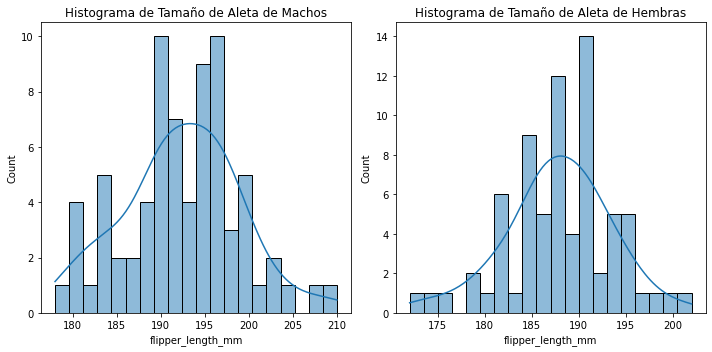

In [37]:
# Hacer una gráfica de barras de la masa corporal asociada a la especie Adelie

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

df_Male_Adelie = df_Adelie[df_Adelie["sex"] == "Male"]
df_Female_Adelie = df_Adelie[df_Adelie["sex"] == "Female"]

sns.histplot(data=df_Male_Adelie, x="flipper_length_mm", bins=20, kde=True, ax = axs[0])
axs[0].set_title(f"Histograma de Tamaño de Aleta de Machos")

sns.histplot(data=df_Female_Adelie, x="flipper_length_mm", bins=20, kde=True, ax = axs[1])
axs[1].set_title(f"Histograma de Tamaño de Aleta de Hembras")

plt.tight_layout()
plt.show()

In [40]:
from scipy.stats import kurtosis

# Media
media_machos = df_Male_Adelie["flipper_length_mm"].mean()
media_hembras = df_Female_Adelie["flipper_length_mm"].mean()

# Desviación estándar
std_machos = df_Male_Adelie["flipper_length_mm"].std()
std_hembras = df_Female_Adelie["flipper_length_mm"].std()

# Curtosis
curtosis_machos = kurtosis(df_Male_Adelie["flipper_length_mm"])
curtosis_hembras = kurtosis(df_Female_Adelie["flipper_length_mm"])

print(f"Media (Machos): {round(media_machos,3)}, Media (Hembras): {round(media_hembras,3)}")
print(f"\nDesviación Estándar (Machos): {round(std_machos,3)}, Desviación Estándar (Hembras): {round(std_hembras,3)}")
print(f"\nCurtosis (Machos): {round(curtosis_machos,3)}, Curtosis (Hembras): {round(curtosis_hembras,3)}")

Media (Machos): 192.411, Media (Hembras): 187.795

Desviación Estándar (Machos): 6.599, Desviación Estándar (Hembras): 5.595

Curtosis (Machos): 0.012, Curtosis (Hembras): 0.488


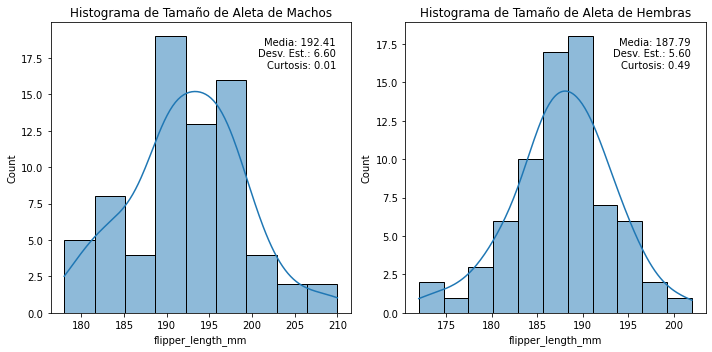

In [42]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

sns.histplot(data=df_Male_Adelie, x="flipper_length_mm", bins="fd", kde=True, ax=axs[0])
axs[0].set_title("Histograma de Tamaño de Aleta de Machos")

# Anotaciones para machos
axs[0].text(0.95, 0.95, f"Media: {media_machos:.2f}\nDesv. Est.: {std_machos:.2f}\nCurtosis: {curtosis_machos:.2f}",
            transform=axs[0].transAxes, fontsize=10, verticalalignment='top', horizontalalignment='right')

# Histograma para hembras
sns.histplot(data=df_Female_Adelie, x="flipper_length_mm", bins="fd", kde=True, ax=axs[1])
axs[1].set_title("Histograma de Tamaño de Aleta de Hembras")

# Anotaciones para hembras
axs[1].text(0.95, 0.95, f"Media: {media_hembras:.2f}\nDesv. Est.: {std_hembras:.2f}\nCurtosis: {curtosis_hembras:.2f}",
            transform=axs[1].transAxes, fontsize=10, verticalalignment='top', horizontalalignment='right')

plt.tight_layout()
plt.show()

**Respuesta:** Vemos entonces que típicamente las aletas de los machos son más grandes y tienen una mayor desviación estándar, pero la distribución del tamaño de las aletas en hembras está más inclinado a la derecha, es decir la moda es mayor a la media.